## 1 - Perkenalan

Nama = Muhammad Ashar Ihsan

Batch = 035

Dataset = [Data](insurance.csv)

Objective = Kita akan melakukan sebuah analisis untuk memprediksi berapa biaya asurasi yang kita bayarkan dengan menggunakan machine learning dari dataset yang berisi mengenai data asuransi di United States

## 2 - Import Libraries

In [41]:
# For basic use
import pandas as pd
import numpy as np

# For visualize
import matplotlib.pyplot as plt
import seaborn as sns

# For algorithms
import sklearn

## 3 - Data Loading

In [2]:
df_ori = pd.read_csv("insurance.csv")
df_ori

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df = df_ori.copy()

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


jelasin kenapa backup

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- tidak ada misvalue
- 7 kolom
- 1337 row
- 3 categoric
- 4 numeric

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


penjelasan singkat data

In [7]:
df.duplicated().sum()

1

In [8]:
baris_duplikat = df[df.duplicated()]

baris_duplikat

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


row duplikat baris ke 581

In [9]:
df = df.drop_duplicates()

df.duplicated().sum()

0

duplicate udah ilang

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

penjelasan singkat kolom apa saja

## 4 - Problem

### Smart Framework

Specific:
Memprediksi insurance charges yang dibayarkan tiap orang.

Measurable:
Akurasi dari prediksi dapat diukur dengan Mean Absolute Error (MAE) dibawah dari 5

Achievable:
Dengan proses yang tepat, penyesuaian model untuk memprediksi biaya asuransi dapat dicapai.

Relevant:
Prediksi harga asuransi yang akurat sangat penting untuk costumer dan juga perusahaan asuransinya. Dimana akan membantu untuk menentukan harga yang adil dan untuk memahami faktor yang paling mempengaruhi biaya asuransi.

Time-bound:
Model akan diterapkan dan melakukan prediksi selama 3 bulan.

### Problem Statement

Memprekdiksi insurance charges yang dibayarkan tiap orang dengan model yang dibuat memiliki MAE dibawah 5 dan dilakukan selama 3 bulan.

## 5 - EDA

penjelasan soal eda

In [11]:
# Mendefinisikan fungsi untuk mengkategorikan overweight
def class_overweight(bmi):
    if 30 <= bmi < 35:
        return 'Overweight Class 1'
    elif 35 <= bmi < 40:
        return 'Overweight Class 2'
    elif bmi >= 40:
        return 'Overweight Class 3'
    else:
        return 'Normal'

# Menerapkan fungsi ke kolom 'bmi'
df['overweight_class'] = df['bmi'].apply(class_overweight)

df[['bmi', 'overweight_class']].sample(20)

,bmi,overweight_class
964,36.765,Overweight Class 2
1281,27.645,Normal
1055,27.645,Normal
500,34.400,Overweight Class 1
604,28.310,Normal
965,27.100,Normal
292,45.540,Overweight Class 3
241,22.135,Normal
717,24.320,Normal
288,36.765,Overweight Class 2


abis itu jelasin udah keganti, instruksi selanjutnya ngitung masing masing kategori

In [13]:
# Menghitung jumlah peserta per kategori
overweight_counts = df['overweight_class'].value_counts().drop('Normal')

# Mengurutkan dari jumlah terbanyak ke terkecil
overweight_counts = overweight_counts.sort_values(ascending=False)

# Menampilkan hasil
overweight_counts

overweight_class
Overweight Class 1    390
Overweight Class 2    225
Overweight Class 3     91
Name: count, dtype: int64

jelasin dikit, abis itu instruksi selanjutnya

C:\Users\LENOVO LOQ\AppData\Local\Temp\ipykernel_12348\245505211.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overweight_counts.index, y=overweight_counts.values, palette='viridis')


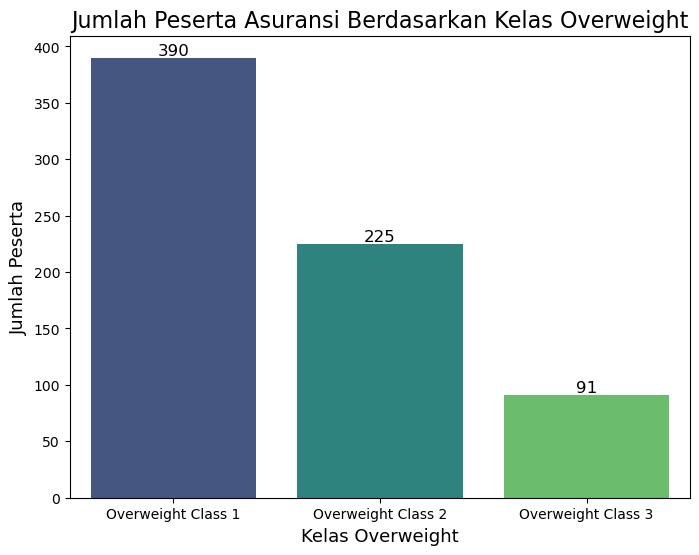

In [14]:
# membuat barplot
plt.figure(figsize=(8,6))
sns.barplot(x=overweight_counts.index, y=overweight_counts.values, palette='viridis')
plt.title('Jumlah Peserta Asuransi Berdasarkan Kelas Overweight', fontsize=16)
plt.xlabel('Kelas Overweight', fontsize=13)
plt.ylabel('Jumlah Peserta', fontsize=13)

# Menampilkan nilai di atas setiap bar
for index, value in enumerate(overweight_counts.values):
    plt.text(index, value + 2, str(value), ha='center', fontsize=12)

plt.show()

jelasin kaya diatas

--------------------------------------------

eksplor target

In [15]:
df['charges'].skew()

1.5153909108403483

Text(0.5, 1.0, 'Histogram of charges')

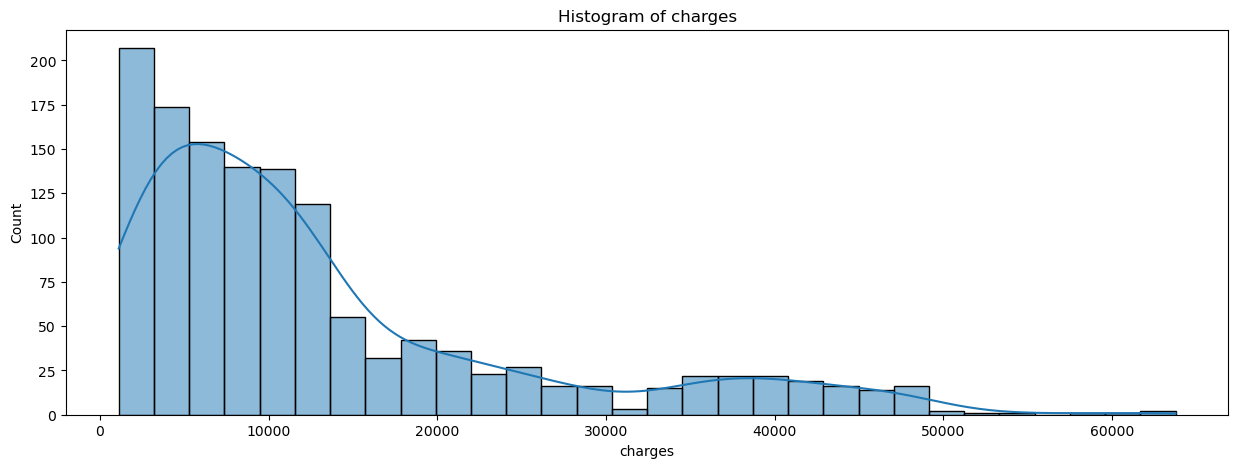

In [16]:
plt.figure(figsize=(15,5))

sns.histplot(df['charges'], kde=True,bins=30)
plt.title('Histogram of charges')

jelasin kalo dia miring dan udah skewed

---------------------------

eksplor kolom numerikal

In [17]:
df[['children','age', 'bmi', 'charges']].corr()

,children,age,bmi,charges
children,1.000000,0.041536,0.012755,0.067389
age,0.041536,1.000000,0.109344,0.298308
bmi,0.012755,0.109344,1.000000,0.198401
charges,0.067389,0.298308,0.198401,1.000000


kayanya children kurang ada korelasi, jadi bakal pake age dan bmi

Text(0.5, 1.0, 'children vs charges')

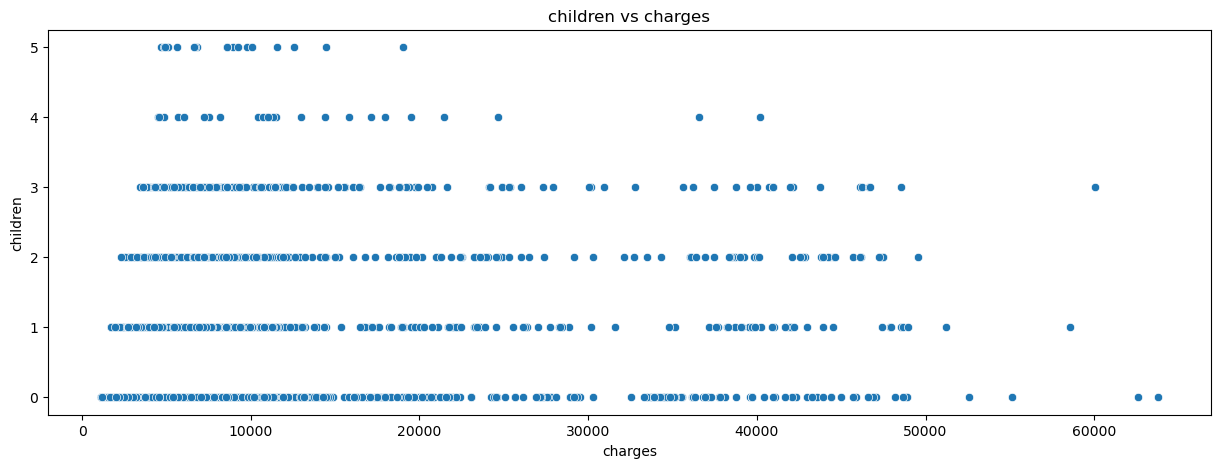

In [19]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='charges', y='children', data=df)
plt.title('children vs charges')

jelasin lagi gaada korelasi

--------------------

eksplor kolom categorical

In [20]:
df

,age,sex,bmi,children,smoker,region,charges,overweight_class
0,19,female,27.900,0,yes,southwest,16884.92400,Normal
1,18,male,33.770,1,no,southeast,1725.55230,Overweight Class 1
2,28,male,33.000,3,no,southeast,4449.46200,Overweight Class 1
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Normal
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Overweight Class 1
1334,18,female,31.920,0,no,northeast,2205.98080,Overweight Class 1
1335,18,female,36.850,0,no,southeast,1629.83350,Overweight Class 2
1336,21,female,25.800,0,no,southwest,2007.94500,Normal


### Ordinal

In [29]:
df['overweight_class'].value_counts()


overweight_class
Normal                631
Overweight Class 1    390
Overweight Class 2    225
Overweight Class 3     91
Name: count, dtype: int64

In [30]:
df.groupby('overweight_class').mean('charges')

,age,bmi,children,charges
overweight_class,,,,
Normal,37.933439,25.506426,1.082409,10713.666901
Overweight Class 1,39.430769,32.343808,1.151282,14452.444487
Overweight Class 2,41.924444,37.182000,1.031111,17022.258883
Overweight Class 3,40.582418,43.103791,1.109890,16784.615546


### Nominal

In [27]:
print(df['sex'].value_counts())
print('-'*30)
print(df['region'].value_counts())
print('-'*30)
print(df['smoker'].value_counts())

sex
male      675
female    662
Name: count, dtype: int64
------------------------------
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64
------------------------------
smoker
no     1063
yes     274
Name: count, dtype: int64


In [28]:
df.groupby('sex').mean('charges')

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.946667,30.943652,1.117037,13974.998864


In [31]:
df.groupby('region').mean('charges')

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.259259,29.195494,1.151235,12450.840844
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [32]:
df.groupby('smoker').mean('charges')

,age,bmi,children,charges
smoker,,,,
no,39.404516,30.651853,1.091251,8440.660307
yes,38.514599,30.708449,1.113139,32050.231832


## 6 - Feature Engineering

### Feature Selection

Based on EDA kolom kolom yang akan saya pakai di dalam pembuatan model adalah kolom a,b,c. Alasannya adalah bla bla.

dan kolom yang tidak saya pakai didalam pembuatan model kali ini adalah kolom f,g,h. Alasannya adalah bla bla bla.

kita bakal coba drop kolom children karena dari eda kurang ada korelasinya dengan charges

In [33]:
df

,age,sex,bmi,children,smoker,region,charges,overweight_class
0,19,female,27.900,0,yes,southwest,16884.92400,Normal
1,18,male,33.770,1,no,southeast,1725.55230,Overweight Class 1
2,28,male,33.000,3,no,southeast,4449.46200,Overweight Class 1
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Normal
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Overweight Class 1
1334,18,female,31.920,0,no,northeast,2205.98080,Overweight Class 1
1335,18,female,36.850,0,no,southeast,1629.83350,Overweight Class 2
1336,21,female,25.800,0,no,southwest,2007.94500,Normal


In [35]:
df = df[['age', 'sex', 'bmi', 'smoker', 'region', 'overweight_class', 'charges']]
df

,age,sex,bmi,smoker,region,overweight_class,charges
0,19,female,27.900,yes,southwest,Normal,16884.92400
1,18,male,33.770,no,southeast,Overweight Class 1,1725.55230
2,28,male,33.000,no,southeast,Overweight Class 1,4449.46200
3,33,male,22.705,no,northwest,Normal,21984.47061
4,32,male,28.880,no,northwest,Normal,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,no,northwest,Overweight Class 1,10600.54830
1334,18,female,31.920,no,northeast,Overweight Class 1,2205.98080
1335,18,female,36.850,no,southeast,Overweight Class 2,1629.83350
1336,21,female,25.800,no,southwest,Normal,2007.94500


### Cek Cardinal

In [53]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,sex,2,"[female, male]"
1,smoker,2,"[yes, no]"
2,region,4,"[southwest, southeast, northwest, northeast]"
3,overweight_class,4,"[Normal, Overweight Class 1, Overweight Class 2, Overweight Class 3]"


jelasin kenapa gaperlu dibersiin

### Split Features (X) dan target (y)

In [36]:
X = df.drop('charges', axis=1)
y = df['charges']

In [37]:
print("fitur:", X.shape)
print("target:",y.shape)

fitur: (1337, 6)
target: (1337,)


jelasin kalo udah ngesplit

### Split Train and Test

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=99)

### Handling Outliers

In [42]:
#check distribution form skewness
num_cols = list(X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])



skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,age,0.1,normal
1,bmi,0.3,normal


jelasin distribusi nya normal

In [44]:
# Get upper, lower boundaries and percentage of outliers

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]

  #checking upper and lower boundary

  if skewness['distribution'][row] == 'skewed':
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()

  #append to list

  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    #round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,age,81.47,-3.09,0.00
1,bmi,48.83,12.43,0.28


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


### Handling missing value

In [47]:
X_train.isnull().sum()

age                 0
sex                 0
bmi                 0
smoker              0
region              0
overweight_class    0
dtype: int64

In [48]:
X_test.isnull().sum()

age                 0
sex                 0
bmi                 0
smoker              0
region              0
overweight_class    0
dtype: int64

jelasin gaada missval

### Split Categorical and Numerical

In [50]:
num_col = ['age', 'bmi']
cat_col_o = ['overweight_class']
cat_col_n = ['sex', 'smoker', 'region']

jelasin pembagian kolom 

In [51]:
X_train_num = X_train[num_col]
X_test_num = X_test[num_col]

X_train_cat_o = X_train[cat_col_o]
X_test_cat_o = X_test[cat_col_o]

X_train_cat_n = X_train[cat_col_n]
X_test_cat_n = X_test[cat_col_n]

In [52]:
X_train_num

,age,bmi
236,18,26.730
682,39,35.300
1118,33,35.750
171,49,30.300
603,64,39.050
...,...,...
1093,22,30.400
1193,48,36.575
1210,36,30.875
1060,24,32.010


### Feature Scaling

In [54]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [55]:
X_train_num.describe()

,age,bmi
count,1069.000000,1069.000000
mean,39.191768,30.627025
std,14.093179,6.066166
min,18.000000,16.815000
25%,27.000000,26.290000
50%,39.000000,30.210000
75%,51.000000,34.800000
max,64.000000,53.130000


In [56]:
scaler = StandardScaler()

scaler.fit(X_train_num)

StandardScaler()

pake standard karena distribusi data normal atau mendekati normal

In [57]:
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [58]:
X_train_num.head(1)

,age,bmi
236,18,26.73


In [59]:
X_train_num_scaled[0]

array([-1.50439354, -0.64272052])

### Feature Encoding

#### Oridinal

In [60]:
X_train_cat_o

,overweight_class
236,Normal
682,Overweight Class 2
1118,Overweight Class 2
171,Overweight Class 1
603,Overweight Class 2
...,...
1093,Overweight Class 1
1193,Overweight Class 2
1210,Overweight Class 1
1060,Overweight Class 1


In [62]:
X_train_cat_o['overweight_class'].unique()

array(['Normal', 'Overweight Class 2', 'Overweight Class 1',
       'Overweight Class 3'], dtype=object)

In [63]:
from sklearn.preprocessing import OrdinalEncoder

In [64]:
encoder_o = OrdinalEncoder(categories=[['Normal', 'Overweight Class 1', 'Overweight Class 2', 'Overweight Class 3']])
encoder_o.fit(X_train_cat_o)

OrdinalEncoder(categories=[['Normal', 'Overweight Class 1',
                            'Overweight Class 2', 'Overweight Class 3']])

In [65]:
X_train_encoded_o = encoder_o.transform(X_train_cat_o)
X_test_encoded_o = encoder_o.transform(X_test_cat_o)

#### Nominal

In [66]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
encoder_n = OneHotEncoder()
encoder_n.fit(X_train_cat_n)

OneHotEncoder()

In [68]:
X_train_encoded_n = encoder_n.transform(X_train_cat_n).toarray()
X_test_encoded_n = encoder_n.transform(X_test_cat_n).toarray()

### Merge (Concat) Data

In [69]:
X_train_final = np.concatenate(
    [X_train_num_scaled, X_train_encoded_o, X_train_encoded_n], axis=1)
X_test_final = np.concatenate(
    [X_test_num_scaled, X_test_encoded_o, X_test_encoded_n], axis=1)

In [70]:
X_train_final[0]

array([-1.50439354, -0.64272052,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ])

## 7 - Model Definition

### Linear Model

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
model_lin = LinearRegression()

### Lasso Model

In [73]:
from sklearn.linear_model import Lasso

In [74]:
model_lasso = Lasso()

## 8 - Model Training

### Linreg Model

In [75]:
model_lin.fit(X_train_final, y_train)

LinearRegression()

### Lasso Model

In [76]:
model_lasso.fit(X_train_final, y_train)

Lasso()

## 9 - Model Evaluation

### Linreg Model

In [81]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [77]:
y_pred_train = model_lin.predict(X_train_final)
y_pred_test = model_lin.predict(X_test_final)

In [79]:
print("MAE Train : ", mean_absolute_error(y_pred_train,y_train))
print("MAE Test : ", mean_absolute_error(y_pred_test,y_test))

MAE Train :  4143.509436760239
MAE Test :  4201.839700646691


In [80]:
print("R2 Train : ", r2_score(y_pred_train,y_train))
print("R2 Test : ", r2_score(y_pred_test,y_test))

R2 Train :  0.6720474893358723
R2 Test :  0.6627675706827081


In [83]:
eval_results = {
    'name': [],
    'MAE - Train': [],
    'MAE - Test': [],
    'MSE - Train': [],
    'MSE - Test': [],
    'RMSE - Train': [],
    'RMSE - Test': [],
    'R2 Score - Train': [],
    'R2 Score - Test': []
}

def model_evaluation(name, model, X_train, X_test, y_train, y_test):
  # Predict Train-Set and Test-Set
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  # Model evaluation using different metrics
  mae_train = mean_absolute_error(y_train, y_pred_train)
  mae_test = mean_absolute_error(y_test, y_pred_test)

  mse_train = mean_squared_error(y_train, y_pred_train)
  mse_test = mean_squared_error(y_test, y_pred_test)

  rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
  rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

  r2score_train = r2_score(y_train, y_pred_train)
  r2score_test = r2_score(y_test, y_pred_test)

  # Save into dictionary
  eval_results['name'].append(name)
  eval_results['MAE - Train'].append(round(mae_train, 5))
  eval_results['MAE - Test'].append(round(mae_test, 5))
  eval_results['MSE - Train'].append(round(mse_train, 5))
  eval_results['MSE - Test'].append(round(mse_test, 5))
  eval_results['RMSE - Train'].append(round(rmse_train, 5))
  eval_results['RMSE - Test'].append(round(rmse_test, 5))
  eval_results['R2 Score - Train'].append(round(r2score_train, 5))
  eval_results['R2 Score - Test'].append(round(r2score_test, 5))

In [84]:
# Evaluate the model

model_evaluation('Linear Regression', model_lin, X_train_final, X_test_final, y_train, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

c:\Users\LENOVO LOQ\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\LENOVO LOQ\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


name,Linear Regression
MAE - Train,4.143509e+03
MAE - Test,4.201840e+03
MSE - Train,3.726006e+07
MSE - Test,3.476207e+07
RMSE - Train,6.104102e+03
RMSE - Test,5.895937e+03
R2 Score - Train,7.530400e-01
R2 Score - Test,7.311500e-01


### Lasso Model

In [85]:
model_lasso_alpha_01 = Lasso(alpha=0.01)
model_lasso_alpha_01.fit(X_train_final, y_train)

# Evaluate the model
model_evaluation('Lasso with alpha=0.01', model_lasso_alpha_01, X_train_final, X_test_final, y_train, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

c:\Users\LENOVO LOQ\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.304e+09, tolerance: 1.613e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\LENOVO LOQ\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\LENOVO LOQ\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


name,Linear Regression,Lasso with alpha=0.01
MAE - Train,4.143509e+03,4.143509e+03
MAE - Test,4.201840e+03,4.201833e+03
MSE - Train,3.726006e+07,3.726006e+07
MSE - Test,3.476207e+07,3.476199e+07
RMSE - Train,6.104102e+03,6.104102e+03
RMSE - Test,5.895937e+03,5.895930e+03
R2 Score - Train,7.530400e-01,7.530400e-01
R2 Score - Test,7.311500e-01,7.311500e-01


In [86]:
model_lasso_alpha_10 = Lasso(alpha=10)
model_lasso_alpha_10.fit(X_train_final, y_train)

# Evaluate the model
model_evaluation('Lasso with alpha=10', model_lasso_alpha_10, X_train_final, X_test_final, y_train, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

c:\Users\LENOVO LOQ\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\LENOVO LOQ\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


name,Linear Regression,Lasso with alpha=0.01,Lasso with alpha=10
MAE - Train,4.143509e+03,4.143509e+03,4.144916e+03
MAE - Test,4.201840e+03,4.201833e+03,4.202531e+03
MSE - Train,3.726006e+07,3.726006e+07,3.726331e+07
MSE - Test,3.476207e+07,3.476199e+07,3.472453e+07
RMSE - Train,6.104102e+03,6.104102e+03,6.104368e+03
RMSE - Test,5.895937e+03,5.895930e+03,5.892753e+03
R2 Score - Train,7.530400e-01,7.530400e-01,7.530200e-01
R2 Score - Test,7.311500e-01,7.311500e-01,7.314400e-01


## 10 - Model Analysis

Kenapa dipilih model yang itu (linreg)

## 11 - Model Saving

In [ ]:
'''import pickle

with open('model_lin.pkl','wb') as file_1:
  pickle.dump(model_lin, file_1)

with open('model_scaler.pkl','wb') as file_2:
  pickle.dump(scaler, file_2)

with open('model_encoder_o.pkl','wb') as file_3:
  pickle.dump(encoder_o, file_3)

with open('model_encoder_n.pkl','wb') as file_4:
  pickle.dump(encoder_n, file_4)

with open('list_num_column.txt','wb') as file_5:
  pickle.dump(num_col, file_5)

with open('list_cat_col_o.txt','wb') as file_6:
  pickle.dump(cat_col_o, file_6)

with open('list_cat_col_n.txt','wb') as file_7:
  pickle.dump(cat_col_n, file_7)'''

## 12 - Kesimpulan 

- Narasi EDA
- Narasi Model Evaluation
- Narasi Model Analysis
- Next Improvement